# Combined Cycle Power Plant Data Set

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error 
import math

Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [3]:
df = pd.read_excel("Folds5x2_pp.xlsx")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Pairwise scatterplots of all the variables in the dataset (including the predictors with the dependent variables)

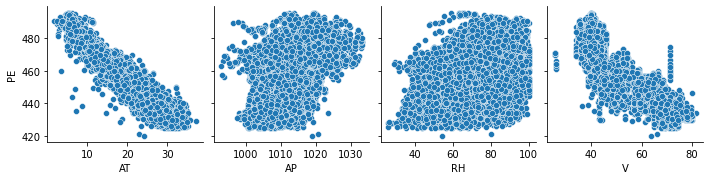

In [5]:
sns.pairplot(df, y_vars=['PE'], x_vars=['AT','AP','RH','V'])
#sns.pairplot(df,hue=('PE'))
plt.show()

From the Ambient Temperature (AT) v Hourly energy output plot (PE), we see that as ambient temperature increases, hourly energy output decreases, exhibiting a negative correlation between the two variables.

From the Ambient Pressure (AP) v Hourly energy output plot (PE), we see that each datapoint is more spread out, but exhibits a positive correlation between the 2 variables, particularly at the high-end of each of the variables. As AP increases, PE is likely to increase as well.

From the Relative Humidity (RH) v Hourly energy output plot(PE), we see that the datapoints are scattered almost evenly over the plot, appearing to exhibit no correlation between the 2 variables.

From the Exhaust Vacuum (V) v Hourly energy output plot(PE), we see that as V increases, hourly energy output decreases, exhibiting a negative correlation between the two variables. 

Summarizing the variables in a table

In [25]:
AT_mean = df["AT"].mean()
AP_mean = df["AP"].mean()
RH_mean = df["RH"].mean()
V_mean = df["V"].mean()
PE_mean = df["PE"].mean()

AT_median = df["AT"].median()
AP_median = df["AP"].median()
RH_median = df["RH"].median()
V_median = df["V"].median()
PE_median = df["PE"].median()

AT_range = df["AT"].max() - df["AT"].min()
AP_range = df["AP"].max() - df["AP"].min()
RH_range = df["RH"].max() - df["RH"].min()
V_range = df["V"].max() - df["V"].min()
PE_range = df["PE"].max() - df["PE"].min()

AT_first = np.percentile(df.AT, 25)
AP_first = np.percentile(df.AP, 25)
RH_first = np.percentile(df.RH, 25)
V_first = np.percentile(df.V, 25)
PE_first = np.percentile(df.PE, 25)

AT_third = np.percentile(df.AT, 75)
AP_third = np.percentile(df.AP, 75)
RH_third = np.percentile(df.RH, 75)
V_third = np.percentile(df.V, 75)
PE_third = np.percentile(df.PE, 75)

AT_ir = AT_third - AT_first
AP_ir = AP_third - AP_first
RH_ir = RH_third - RH_first
V_ir = V_third - V_first
PE_ir = PE_third - PE_first

stats = pd.DataFrame({"mean":[AT_mean, AP_mean, RH_mean, V_mean, PE_mean],
                      "median":[AT_median, AP_median, RH_median, V_median, PE_median],
                      "range":[AT_range, AP_range, RH_range, V_range, PE_range],
                      "first quartile":[AT_first, AP_first, RH_first, V_first, PE_first],
                      "third quartile":[AT_third, AP_third, RH_third, V_first, PE_first],
                      "interquartile range":[AT_ir, AP_ir, RH_ir, V_ir, PE_ir]})
stats.index = ['AT','AP','RH','V','PE']
stats

,mean,median,range,first quartile,third quartile,interquartile range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
V,54.305804,52.080,56.20,41.7400,41.74,24.8000
PE,454.365009,451.550,75.50,439.7500,439.75,28.6800


# Simple Linear Regression model to predict the response


AT p-value: 
Intercept    0.0
AT           0.0
dtype: float64
AP p-value: 
Intercept    0.0
AP           0.0
dtype: float64
RH p-value: 
Intercept    0.0
RH           0.0
dtype: float64
V p-value: 
Intercept    0.0
V            0.0
dtype: float64


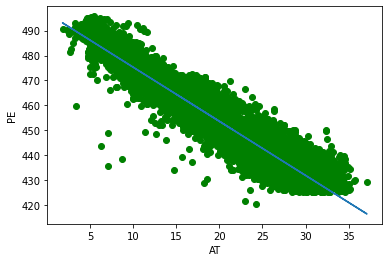

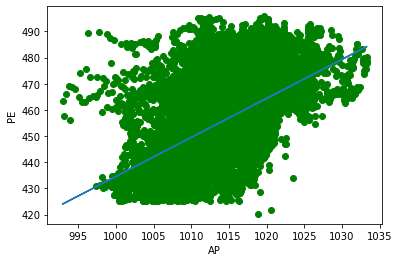

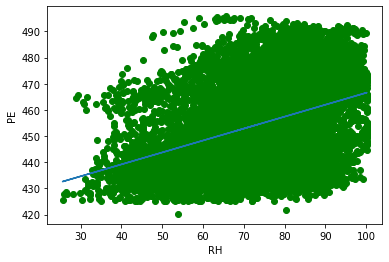

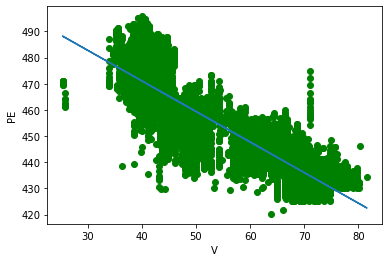

In [60]:
pe = df["PE"].to_numpy().reshape(-1,1)
#Predictor AT
at = df["AT"].to_numpy().reshape(-1,1)
#AT_reg = LinearRegression().fit(at, pe)
AT_reg = smf.ols(formula='PE ~ AT', data=df).fit()
#Predictor AP
ap = df["AP"].to_numpy().reshape(-1,1)
AP_reg = smf.ols(formula='PE ~ AP', data=df).fit()
#Predictor RH
rh = df["RH"].to_numpy().reshape(-1,1)
RH_reg = smf.ols(formula='PE ~ RH', data=df).fit()
#Predictor V
v = df["V"].to_numpy().reshape(-1,1)
V_reg = smf.ols(formula='PE ~ V', data=df).fit()

print("AT p-value: ")
print(AT_reg.pvalues)
print("AP p-value: ")
print(AP_reg.pvalues)
print("RH p-value: ")
print(RH_reg.pvalues)
print("V p-value: ")
print(V_reg.pvalues)

plt.scatter(at, pe,  color='green')
m, b = np.polyfit(df["AT"], df["PE"],1)
plt.plot(at, m*at + b)
plt.xlabel("AT")
plt.ylabel("PE")
plt.show()

plt.scatter(ap, pe,  color='green')
m, b = np.polyfit(df["AP"], df["PE"],1)
plt.plot(ap, m*ap + b)
plt.xlabel("AP")
plt.ylabel("PE")
plt.show()

plt.scatter(rh, pe,  color='green')
m, b = np.polyfit(df["RH"], df["PE"],1)
plt.plot(rh, m*rh + b)
plt.xlabel("RH")
plt.ylabel("PE")
plt.show()

plt.scatter(v, pe,  color='green')
m, b = np.polyfit(df["V"], df["PE"],1)
plt.plot(v, m*v + b)
plt.xlabel("V")
plt.ylabel("PE")
plt.show()


As we can read from the printouts, all predictors generated a pvalue of 0, meaning a statistically significant association between each predictor and reponse. 

In the plot of V against PE, there are numerous outliers at V=15, and V=72. Had those outliers been removed, I believe the scores of V,PE regression would increase

# Multiple regression model to predict the response using all predictors

In [82]:
x = df.drop("PE", axis=1)
y = df["PE"]
mr = smf.ols(formula = 'PE ~ AT + AP + RH + V', data = df).fit()
mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:04:45   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AT, AP, RH, and V all have a very small p value, therefore we cannot reject the null hypothesis for any of the predictors, meaning there is association between AT, AP, RH, and V with PE. 

# Univariate regression coefficient vs multiple regression coefficient plot

my results from 1c shows the same statistically significant coorelation between the predictor and the response as 1d. As all p values generated from both 1c and 1d are 0. 

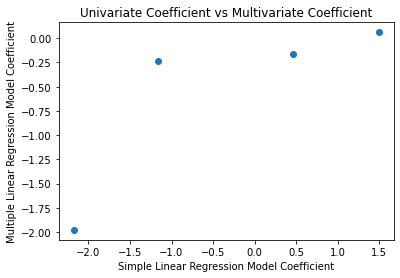

In [108]:
at_coef = AT_reg.params.values[1:]
ap_coef = AP_reg.params.values[1:]
rh_coef = RH_reg.params.values[1:]
v_coef = V_reg.params.values[1:]
x_values = [at_coef[0], ap_coef[0], rh_coef[0], v_coef[0]]
y_values = mr.params.values[1:]

plt.scatter(x_values, y_values)
plt.title("Univariate Coefficient vs Multivariate Coefficient")
plt.xlabel("Simple Linear Regression Model Coefficient")
plt.ylabel("Multiple Linear Regression Model Coefficient")
plt.show()

# Evidence of non linear relationship


In [79]:
poly = PolynomialFeatures(degree=2)
at_ply = poly.fit_transform(at)
at_model = sm.OLS(pe, at_ply).fit()
print("AT pvalues:")
print(at_model.pvalues)
ap_ply = poly.fit_transform(ap)
ap_model = sm.OLS(pe, ap_ply).fit()
print("AP pvalues:")
print(ap_model.pvalues)
rh_ply = poly.fit_transform(rh)
rh_model = sm.OLS(pe, rh_ply).fit()
print("RH pvalues:")
print(rh_model.pvalues)
v_ply = poly.fit_transform(v)
v_model = sm.OLS(pe, v_ply).fit()
print("V pvalues:")
print(v_model.pvalues)

AT pvalues:
[0.00000000e+000 0.00000000e+000 9.42664535e-179]
AP pvalues:
[1.78954955e-18 7.45324253e-19 7.90831611e-20]
RH pvalues:
[0.00000000e+00 1.63895751e-04 2.14600362e-01]
V pvalues:
[0.00000000e+000 0.00000000e+000 4.18258695e-165]


For predictor AT, a polynomial regression yielded a pvalue of 0, which indicate that there is a strong nonlinear association between AT and PE.

For predictor AP, a polynomial regression yielded a pvalue close to 0, which indicate that there is a strong gnonlinear association between AP and PE.

For predictor RH, a polynomial regression yielded a pvalue close to 0, which indicate that there is a strong gnonlinear association between RH and PE.

For predictor V, a polynomial regression yielded a pvalue close to 0, which indicate that there is a strong gnonlinear association between V and PE.


# Evidence of association of interactions of predictors with the response

In [84]:
at_ap = smf.ols(formula = 'PE ~ AT + AP + AT:AP', data = df).fit()
print(at_ap.pvalues)
at_rh = smf.ols(formula = 'PE ~ AT + RH + AT:RH', data = df).fit()
print(at_rh.pvalues)
at_v = smf.ols(formula = 'PE ~ AT + V + AT:V', data = df).fit()
print(at_v.pvalues)
ap_rh = smf.ols(formula = 'PE ~ AP + RH + AP:RH', data = df).fit()
print(ap_rh.pvalues)
ap_v = smf.ols(formula = 'PE ~ AP + V + AP:V', data = df).fit()
print(ap_v.pvalues)
rh_v = smf.ols(formula = 'PE ~ RH + V + RH:V', data = df).fit()
print(rh_v.pvalues)

Intercept    3.250470e-40
AT           3.398330e-01
AP           1.804862e-10
AT:AP        5.247289e-01
dtype: float64
Intercept     0.000000e+00
AT            0.000000e+00
RH            6.621779e-01
AT:RH        9.038713e-100
dtype: float64
Intercept     0.000000e+00
AT            0.000000e+00
V             0.000000e+00
AT:V         4.802887e-251
dtype: float64
Intercept    9.099542e-26
AP           1.655809e-42
RH           8.108336e-04
AP:RH        1.826111e-03
dtype: float64
Intercept    7.211382e-20
AP           2.268027e-67
V            7.845468e-15
AP:V         4.992620e-18
dtype: float64
Intercept    0.000000e+00
RH           7.200815e-76
V            8.587213e-76
RH:V         1.335620e-39
dtype: float64


Since the p values of all pairs except for AT and AP have a less than a significance value of 0.25, this means that there is strong evidence of linear association between each pairwise interaction terms. However, the AT, AP pair with their higher p-value shows that there may be no pairwise interaction between the two predictors.

# KNN using both normalized and raw features

k = 7 gives the best fit i.e. smallest MSE for raw data of 16.482753557389522


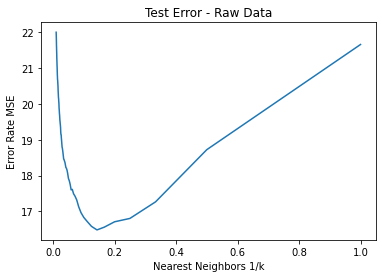

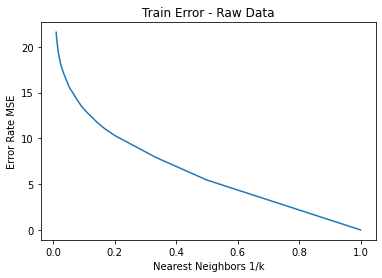

In [106]:
train, test = train_test_split(df, test_size = 0.3)
y_train = train['PE'].to_numpy()
x_train = train.drop(columns='PE')
y_test = test['PE'].to_numpy()
x_test = test.drop(columns='PE')

#raw data
accuracies = []
accuracies_train = []
k = []

for i in range(1,100,1):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(x_train, y_train)
    y_pred_test = regressor.predict(x_test)
    y_pred_train = regressor.predict(x_train)
    error = mean_squared_error(y_test,y_pred_test)
    error_train = mean_squared_error(y_train,y_pred_train)
    accuracies.append(error)
    accuracies_train.append(error_train)
    k.append(i)

k_star = k[np.argmin(accuracies)]
print("k = " + str(k_star) + ' gives the best fit i.e. smallest MSE for raw data of ' + str(min(accuracies)))

new_k = [1 / number for number in k]
plt.plot(new_k, accuracies)
plt.title("Test Error - Raw Data")
plt.xlabel("Nearest Neighbors 1/k")
plt.ylabel("Error Rate MSE")
plt.show()
    
plt.plot(new_k, accuracies_train)
plt.title("Train Error - Raw Data")
plt.xlabel("Nearest Neighbors 1/k")
plt.ylabel("Error Rate MSE")
plt.show()

k = 2 gives the best fit i.e. smallest MSE for normalized data of 1.5441421370368614e-06


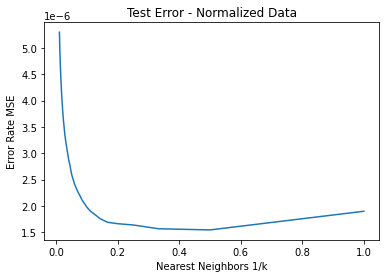

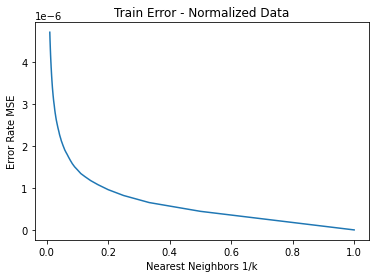

In [107]:
#normalised data
#preprocessing
df_n = preprocessing.normalize(df)
train, test = train_test_split(df_n, test_size = 0.3)
y_train_n = train[:,4]
x_train_n = train[:, :-1]
y_test_n = test[:,4]
x_test_n = test[:, :-1]

accuracies = []
accuracies_train = []
k = []

for i in range(1,100,1):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(x_train_n, y_train_n)
    y_pred_test = regressor.predict(x_test_n)
    y_pred_train = regressor.predict(x_train_n)
    error = mean_squared_error(y_test_n,y_pred_test)
    error_train = mean_squared_error(y_train_n,y_pred_train)
    accuracies.append(error)
    accuracies_train.append(error_train)
    k.append(i)
    
k_star = k[np.argmin(accuracies)]
print("k = " + str(k_star) + ' gives the best fit i.e. smallest MSE for normalized data of ' + str(min(accuracies)))

new_k = [1 / number for number in k]
plt.plot(new_k, accuracies)
plt.title("Test Error - Normalized Data")
plt.xlabel("Nearest Neighbors 1/k")
plt.ylabel("Error Rate MSE")
plt.show()
    
plt.plot(new_k, accuracies_train)
plt.title("Train Error - Normalized Data")
plt.xlabel("Nearest Neighbors 1/k")
plt.ylabel("Error Rate MSE")
plt.show()


In [102]:
train, test = train_test_split(df, test_size = 0.3)
y_train = train['PE'].to_numpy()
x_train = train.drop(columns='PE')
y_test = test['PE'].to_numpy()
x_test = test.drop(columns='PE')

#regression model on data with all predictors
reg = LinearRegression().fit(x_train, y_train)
reg_y_pred = reg.predict(x_test)
reg_y_pred_train = reg.predict(x_train)
print('Multivariate Linear Regression Test Mean squared error: %.2f'
      % mean_squared_error(y_test, reg_y_pred))
print('Multivariate Linear Regression Train Mean squared error: %.2f'
      % mean_squared_error(y_train, reg_y_pred_train))

#regression model on data with all interaction terms
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
n_x_train = poly.fit_transform(x_train)
interaction = LinearRegression().fit(n_x_train, y_train)
n_x_test = poly.fit_transform(x_test)
reg_y_pred = interaction.predict(n_x_test)
reg_y_pred_train = interaction.predict(n_x_train)
print('Multivariate Interaction terms Regression Test Mean squared error: %.2f'
      % mean_squared_error(y_test, reg_y_pred))
print('Multivariate Interaction terms Regression Train Mean squared error: %.2f'
      % mean_squared_error(y_train, reg_y_pred_train))

#regression model on data with quadratic nonlinearities
y_train_s = np.square(y_train)
x_train_s = np.square(x_train)
y_test_s = np.square(y_test)
x_test_s = np.square(x_test)
reg = LinearRegression().fit(x_train_s, y_train)
reg_y_pred = reg.predict(x_test_s)
reg_y_pred_train = reg.predict(x_train_s)
print('Quadratic Nonlinear Regression Test Mean squared error: %.2f'
      % mean_squared_error(y_test, reg_y_pred))
print('Quadratic Nonlinear Regression Train Mean squared error: %.2f'
      % mean_squared_error(y_train, reg_y_pred_train))

Multivariate Linear Regression Test Mean squared error: 19.24
Multivariate Linear Regression Train Mean squared error: 21.43
Multivariate Interaction terms Regression Test Mean squared error: 16.96
Multivariate Interaction terms Regression Train Mean squared error: 19.24
Quadratic Nonlinear Regression Test Mean squared error: 34.36
Quadratic Nonlinear Regression Train Mean squared error: 37.28


As for removing insignificant variables using p-values. It is very possibly wrong but my data shows that no variables are insignificant through their p-values. Therefore, nothing to be done.